In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('train.csv')#
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [9]:
len(test)

1459

In [10]:
def percent_missing(df):
    percent_nan = df.isnull().sum()/len(df)*100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

##### Check what percentage of data is missing train and test set with barplot

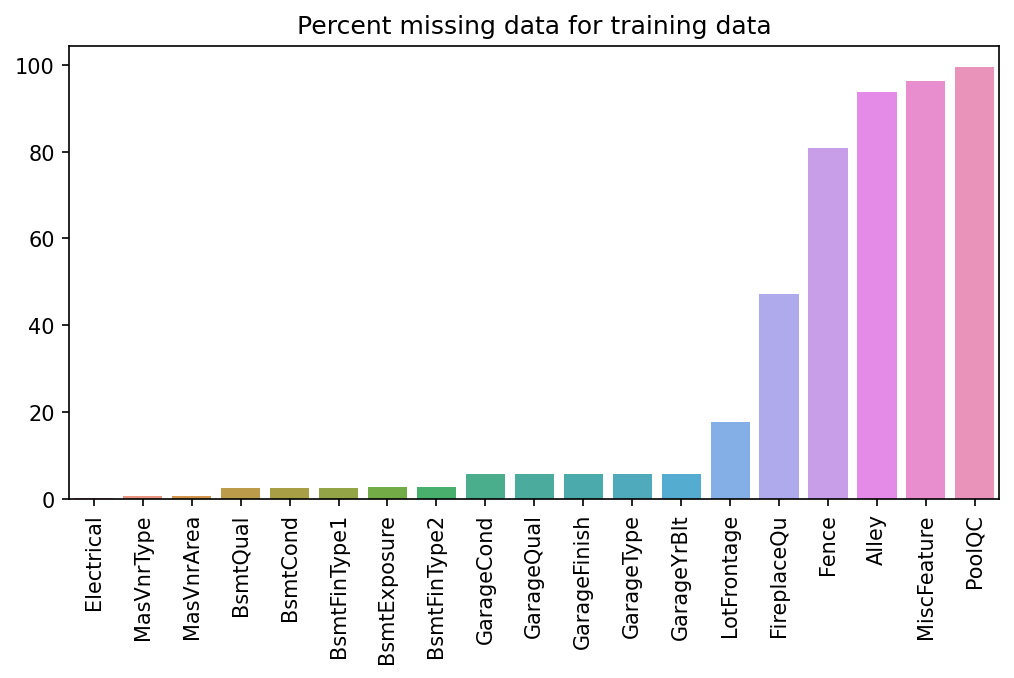

In [11]:
percent_nan = percent_missing(df)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for training data');

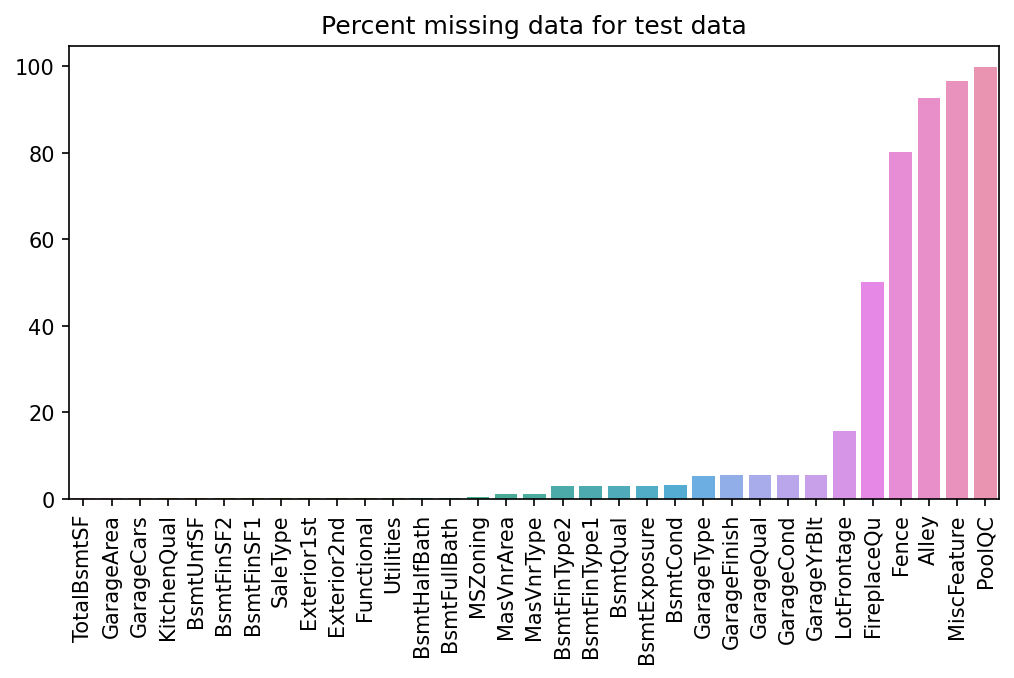

In [12]:
percent_nan = percent_missing(test)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for test data');

#### Remove and replace data

In [13]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','Id','Utilities'],axis=1)
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','Id','Utilities'],axis=1)

In [14]:
df = df.dropna(axis=0, subset = ['Electrical'])

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

bsmt_missing = ['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2']
df[bsmt_missing] = df[bsmt_missing].fillna('None')
garage_missing = ['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage_missing] = df[garage_missing].fillna('None')

test[bsmt_missing] = test[bsmt_missing].fillna('None')
test[garage_missing] = test[garage_missing].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

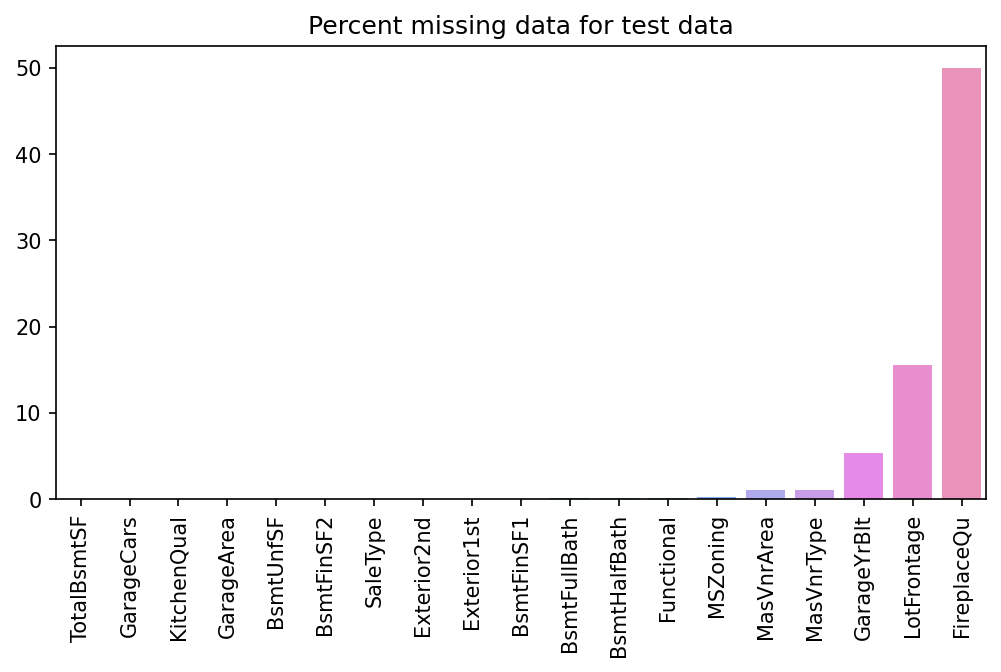

In [15]:
percent_nan = percent_missing(test)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for test data');

In [16]:
missing_col_num = ['BsmtUnfSF','GarageCars','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtFinSF1','BsmtFullBath','BsmtHalfBath']
test[missing_col_num] = test[missing_col_num].fillna(0)
test['SaleType'] = test['SaleType'].fillna('None')
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [17]:
test.shape

(1459, 74)

In [18]:
test['Functional'] = test['Functional'].fillna('Typ')
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [19]:
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [20]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [21]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [22]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [23]:
percent_nan = percent_missing(test)
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title(label='Percent missing data for test data');

ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

#### Upper plotting error shows there is no remaining missing data to plot in test set

## Transform data

In [45]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

In [46]:
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')
my_object_test = test.select_dtypes(include='object')
my_numeric_test = test.select_dtypes(exclude='object')
my_object_df = pd.get_dummies(my_object_df,drop_first=True)
my_object_test = pd.get_dummies(my_object_test,drop_first=True)

In [29]:
#my_numeric_df.shape

In [30]:
#my_numeric_test.shape

In [47]:
final_df = pd.concat([my_object_df,my_numeric_df],axis=1)
final_test = pd.concat([my_object_test,my_numeric_test],axis=1)

In [48]:
len(final_test)

1459

In [49]:
final_df.shape, final_test.shape

((1459, 259), (1459, 245))

In [50]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [35]:
#model.fit(scaled_X,y)

In [36]:
#len(scaled_test.scale_)

In [51]:
train_cols = X.columns
test_cols = final_test.columns

common_cols = test_cols.intersection(train_cols)
train_not_test = train_cols.difference(test_cols)

In [52]:
train_not_test

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Fa', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll'],
      dtype='object')

In [53]:
list = ['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Fa', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll']
for col in list:
    final_test[col] = 0

In [54]:
list = ['MSSubClass_150', 'SaleType_None']
for col in list:
    X[col] = 0

In [55]:
X.shape, final_test.shape

((1459, 260), (1459, 260))

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
scaler.fit(X)

StandardScaler()

In [58]:
scaled_X = scaler.transform(X)

In [59]:
scaled_test = scaler.transform(final_test)

In [60]:
scaled_X.size

379340

In [61]:
scaled_test.size

379340

## Linear regression

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model.fit(scaled_X,y)

LinearRegression()

In [33]:
pred = model.predict(final_test)

In [34]:
pred

array([-3.83574307e+18, -5.99531734e+18, -5.37417181e+18, ...,
       -4.40648661e+18, -1.08135867e+17, -4.60418509e+18])

In [55]:
submission['SalePrice'] = pred

In [56]:
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 5.97

## Lasso regression

In [3]:
from sklearn.linear_model import Lasso,ElasticNet,Ridge

In [58]:
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10]
param_grid = {'alpha':alpha}

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.model_selection import GridSearchCV

In [61]:
lasso = Lasso(max_iter=50000)

In [62]:
lasso.fit(scaled_X,y)

Lasso(max_iter=50000)

In [63]:
grid = GridSearchCV(lasso,param_grid)

In [64]:
grid.fit(scaled_X,y)

C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61448214539.3956, tolerance: 759196530.132777
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38037895767.959015, tolerance: 728756838.1994224
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18989675607.76474, tolerance: 699016094.6722006
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

GridSearchCV(estimator=Lasso(max_iter=50000),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [65]:
lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [66]:
grid.best_params_

{'alpha': 10}

In [67]:
pred = lasso.predict(scaled_test)
submission['SalePrice'] = pred
submission.to_csv('./sample_submission.csv', index=False)

In [68]:
lasso = Lasso(max_iter=50000,alpha=10)

In [69]:
lasso.fit(scaled_X,y)

Lasso(alpha=10, max_iter=50000)

In [70]:
pred = lasso.predict(scaled_test)
submission['SalePrice'] = pred
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 1.6376

### ---
### Ridge regression

In [36]:
ridge = Ridge()

In [37]:
ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [55]:
alpha = [0.001,0.01,0.1,1,10,100,90,80,70,110,120,130,140,60,150,175,200,250,300,400,500,600,700,800,900]
param_grid = {'alpha':alpha}
grid = GridSearchCV(ridge,param_grid)

In [56]:
grid.fit(scaled_X,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 90, 80, 70,
                                   110, 120, 130, 140, 60, 150, 175, 200, 250,
                                   300, 400, 500, 600, 700, 800, 900]})

In [57]:
grid.best_params_

{'alpha': 400}

In [58]:
ridge = Ridge(alpha=400)
ridge.fit(scaled_X,y)

Ridge(alpha=400)

In [67]:
preds = ridge.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 7.07

### ----
### Elastic net

In [65]:
from sklearn.linear_model import ElasticNetCV

In [66]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [67]:
elastic_model.fit(scaled_X,y)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [68]:
elastic_model.l1_ratio_

1.0

In [70]:
preds = elastic_model.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 6.75

### ----
### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
forest = RandomForestRegressor()

In [63]:
n_estimators=[60,70,80,90,100,150,200,250]
max_features= [2,3,4,5,6]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap}
grid = GridSearchCV(forest,param_grid)

In [64]:
grid.fit(scaled_X,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [60, 70, 80, 90, 100, 150, 200, 250]})

In [66]:
grid.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 60}

In [69]:
preds = grid.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 0.44

In [64]:
n_estimators=[60,55,65,60]
max_features= [6,7,8]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap}
grid = GridSearchCV(forest,param_grid)

In [65]:
grid.fit(scaled_X,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_features': [6, 7, 8],
                         'n_estimators': [60, 55, 65, 60]})

In [66]:
grid.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 60}

In [67]:
preds = grid.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 0.45

### ---
### AdaBoostRegressor

In [71]:
from sklearn.ensemble import AdaBoostRegressor

In [72]:
ada_model = AdaBoostRegressor()

In [73]:
from sklearn.model_selection import GridSearchCV

In [76]:
help(AdaBoostRegressor)

Help on class AdaBoostRegressor in module sklearn.ensemble._weight_boosting:

class AdaBoostRegressor(sklearn.base.RegressorMixin, BaseWeightBoosting)
 |  AdaBoostRegressor(base_estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 |  
 |  An AdaBoost regressor.
 |  
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      If ``None``, then the base es

In [78]:
param_grid = {'loss':['linear', 'square', 'exponential'],
              'n_estimators':[20,50,80,100,150,200],
              'learning_rate':[0.1,0.05,0.2]}
grid = GridSearchCV(ada_model,param_grid)

In [79]:
grid.fit(scaled_X,y)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [20, 50, 80, 100, 150, 200]})

In [80]:
grid.best_params_

{'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 200}

In [81]:
preds = grid.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 0.48372

### ----
### Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gr_boost = GradientBoostingRegressor()

In [53]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [54]:
grid = GridSearchCV(gr_boost,param_grid)

In [55]:
grid.fit(scaled_X,y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [57]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [56]:
preds = grid.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 2.86208

In [58]:
param_grid = {'n_estimators':[100,150,180,200],
             'learning_rate':[0.2,0.5,0.35,0.75],
             'max_depth':[5,6,7]}
grid = GridSearchCV(gr_boost,param_grid)
grid.fit(scaled_X,y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.5, 0.35, 0.75],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 150, 180, 200]})

In [59]:
grid.best_params_

{'learning_rate': 0.35, 'max_depth': 5, 'n_estimators': 100}

In [60]:
preds = grid.predict(scaled_test)
submission['SalePrice'] = preds
submission.to_csv('./sample_submission.csv', index=False)

#### RMSE = 0.87259